In [98]:
import os
os.getcwd()

'c:\\Users\\naikv\\OneDrive\\Desktop\\Coursera_datascience\\Github_projects\\Fraud_detection'

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [100]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [101]:
data = pd.read_csv('c:\\Users\\naikv\\OneDrive\\Desktop\\Coursera_datascience\\Github_projects\\Fraud_detection\\data\\AIML_Dataset.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [102]:
data.shape

(6362620, 11)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [104]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [105]:
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [106]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [107]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [108]:
Fraud_pct = (data["isFraud"].value_counts()[1] / data.shape[0]) * 100
print(f'Fraud % we have in our dataset is: {Fraud_pct:.2f} %')

Fraud % we have in our dataset is: 0.13 %


# Data Visualisation
### 1. Count of transaction types

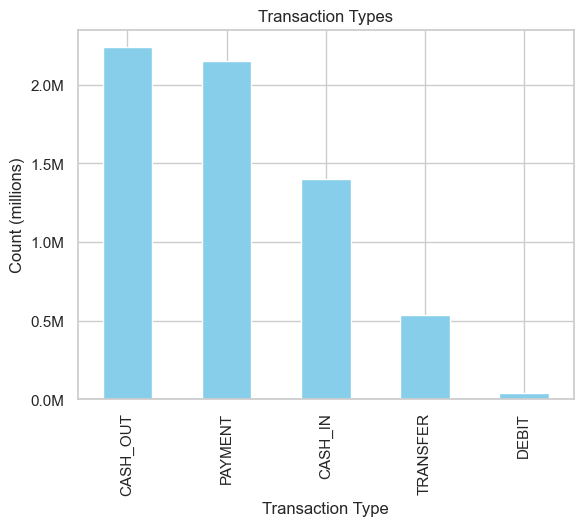

In [109]:
import matplotlib.ticker as ticker

ax = data['type'].value_counts().plot(
    kind='bar',
    title="Transaction Types",
    color="skyblue"
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.xlabel("Transaction Type")
plt.ylabel("Count (millions)")
plt.show()


### 2. Fraud by transaction type

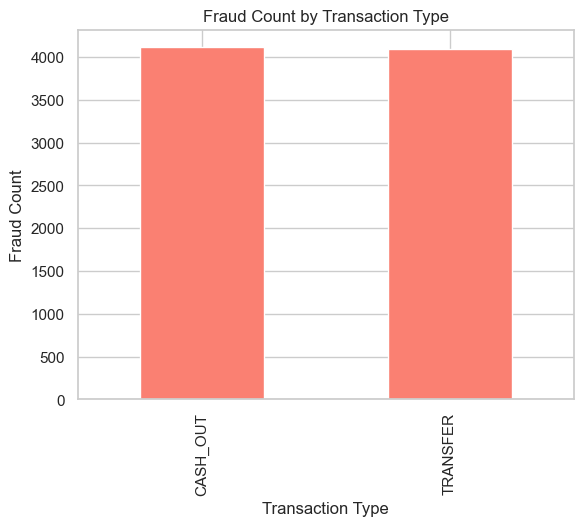

In [110]:
fraud_by_type = data[data['isFraud'] == 1]['type'].value_counts()

fraud_by_type.plot(kind='bar', 
                   color='salmon', 
                   title='Fraud Count by Transaction Type')

plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.show()

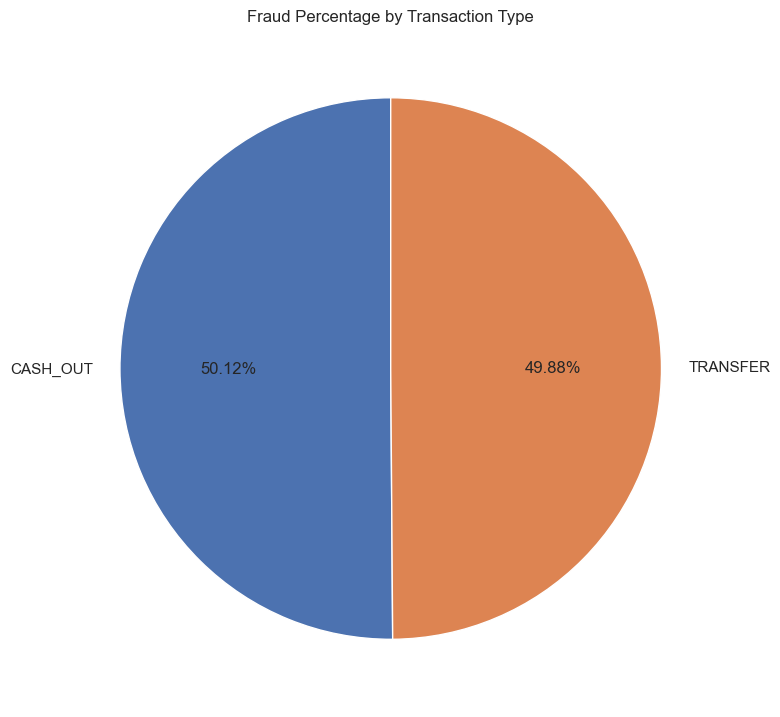

In [111]:
fraud_percentage = fraud_by_type / fraud_by_type.sum() * 100


plt.figure(figsize=(8, 8))  
fraud_percentage.plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90
)

plt.title("Fraud Percentage by Transaction Type")
plt.ylabel("")
plt.tight_layout() 
plt.show()

In [112]:
data["amount"].describe().astype(int) #The distribution is right skewed as mean is ~75K and max is 92M

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

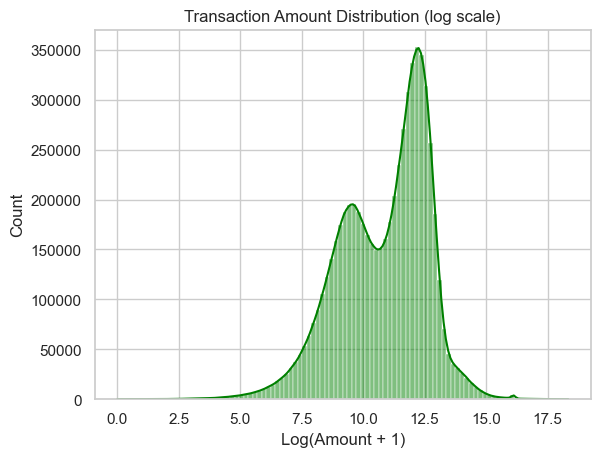

In [113]:
sns.histplot(np.log1p(data["amount"]), bins=100, kde = True, color='green')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

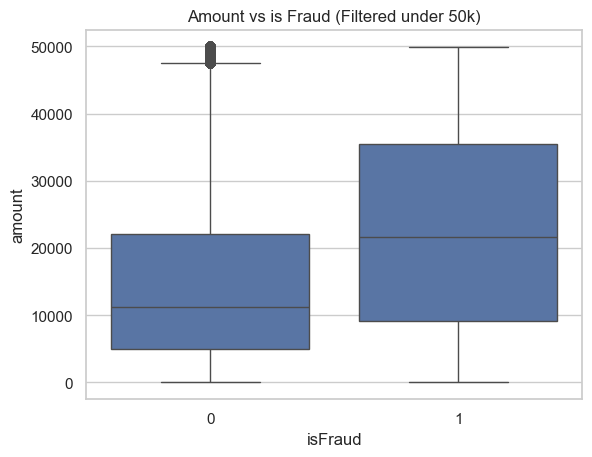

In [114]:
sns.boxplot(data = data[data["amount"]< 50000], x= "isFraud", y="amount")
plt.title("Amount vs is Fraud (Filtered under 50k)")
plt.show()

In [115]:
data["balanceDiffOrig"] = data["oldbalanceOrg"] - data["newbalanceOrig"] 
data["balanceDiffDest"] = data["newbalanceDest"] - data["oldbalanceDest"]

In [116]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,850002.52,850002.52


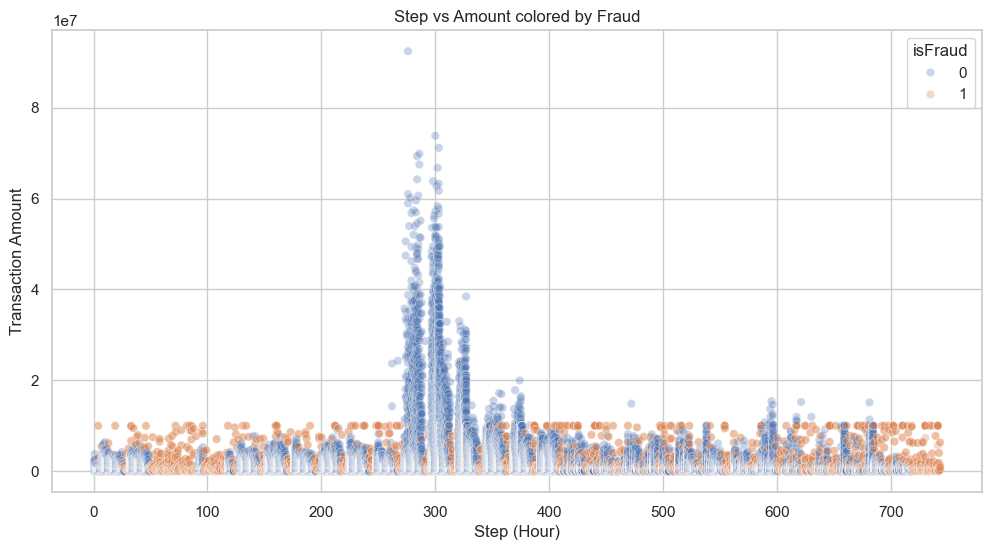

In [117]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=data,
    x="step",
    y="amount",
    hue="isFraud",
    alpha=0.3
)

plt.title("Step vs Amount colored by Fraud")
plt.xlabel("Step (Hour)")
plt.ylabel("Transaction Amount")
plt.show()


# Categorising the columns

In [118]:
data = data.drop(["step","isFlaggedFraud", 'nameOrig','nameDest' ],axis=1)
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   type             object 
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   isFraud          int64  
 7   balanceDiffOrig  float64
 8   balanceDiffDest  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 436.9+ MB


In [120]:
## get all the numeric features
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 8


In [121]:
##categorical features
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 1


In [122]:
## Discrete features
discrete_features=[feature for feature in num_features if len(data[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


In [123]:
## coontinuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 7


In [124]:
cat_features, discrete_features

(['type'], ['isFraud'])

In [125]:
continuous_features

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'balanceDiffOrig',
 'balanceDiffDest']

# Pre-Model training

In [126]:
df = data.copy()

In [127]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [128]:
## Independent And dependent features
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [129]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,11668.14,0.0


In [131]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=63)

In [132]:
X_train.shape,X_test.shape

((5090096, 8), (1272524, 8))

In [133]:
corr_matrix = X_train[continuous_features].corr()

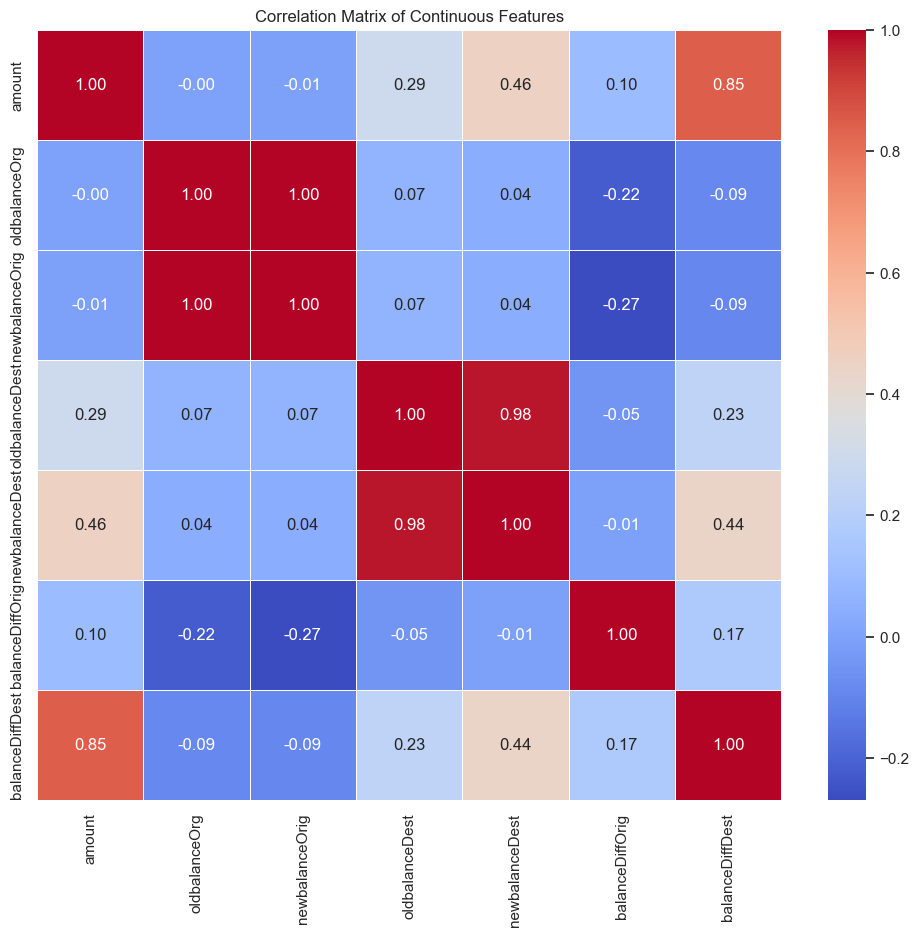

In [134]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features")
plt.show()

In [135]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [137]:
## threshold--Domain expertise
corr_features=correlation(X_train[continuous_features],0.90)

In [138]:
## drop features when correlation is more than 0.90 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((5090096, 6), (1272524, 6))

In [139]:
corr_features

{'newbalanceDest', 'newbalanceOrig'}

In [140]:
X_train

,type,amount,oldbalanceOrg,oldbalanceDest,balanceDiffOrig,balanceDiffDest
1701352,PAYMENT,8757.92,45375.00,0.00,8757.92,0.00
186991,CASH_OUT,59356.22,711367.48,617839.86,59356.23,217539.52
2934681,CASH_IN,292973.34,21390.00,9933.11,-292973.34,-9933.11
3542130,CASH_OUT,3966.38,5036.00,1780750.44,3966.38,3966.38
1856336,TRANSFER,110526.60,82053.24,229900.22,82053.24,110526.61
...,...,...,...,...,...,...
1210897,CASH_OUT,367283.19,0.00,5286736.11,0.00,367283.19
5832992,CASH_IN,97186.70,11089108.18,410397.64,-97186.70,-97186.70
5376338,TRANSFER,1617569.97,142116.00,0.00,142116.00,1617569.97
1467607,PAYMENT,7742.17,0.00,0.00,0.00,0.00


# Column Transform (Standard Scaler + One hot Encoding)

In [141]:
# Create Column Transformer with 3 types of transformers
cat_features = X_train.select_dtypes(include="object").columns
num_features = X_train.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [142]:
cat_features, num_features

(Index(['type'], dtype='object'),
 Index(['amount', 'oldbalanceOrg', 'oldbalanceDest', 'balanceDiffOrig',
        'balanceDiffDest'],
       dtype='object'))

In [143]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['type'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['amount', 'oldbalanceOrg', 'oldbalanceDest', 'balanceDiffOrig',
       'balanceDiffDest'],
      dtype='object'))])

In [144]:
X_train

,type,amount,oldbalanceOrg,oldbalanceDest,balanceDiffOrig,balanceDiffDest
1701352,PAYMENT,8757.92,45375.00,0.00,8757.92,0.00
186991,CASH_OUT,59356.22,711367.48,617839.86,59356.23,217539.52
2934681,CASH_IN,292973.34,21390.00,9933.11,-292973.34,-9933.11
3542130,CASH_OUT,3966.38,5036.00,1780750.44,3966.38,3966.38
1856336,TRANSFER,110526.60,82053.24,229900.22,82053.24,110526.61
...,...,...,...,...,...,...
1210897,CASH_OUT,367283.19,0.00,5286736.11,0.00,367283.19
5832992,CASH_IN,97186.70,11089108.18,410397.64,-97186.70,-97186.70
5376338,TRANSFER,1617569.97,142116.00,0.00,142116.00,1617569.97
1467607,PAYMENT,7742.17,0.00,0.00,0.00,0.00


In [145]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [146]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,-0.284163,-0.273063,-0.323526,0.205200,-0.152821
1,1.0,0.0,0.0,0.0,-0.200071,-0.042507,-0.141929,0.551554,0.114693
2,0.0,0.0,0.0,0.0,0.188190,-0.281366,-0.320607,-1.860202,-0.165036
3,1.0,0.0,0.0,0.0,-0.292126,-0.287028,0.199876,0.172401,-0.147944
4,0.0,0.0,0.0,1.0,-0.115028,-0.260366,-0.255953,0.706919,-0.016904
...,...,...,...,...,...,...,...,...,...
5090091,1.0,0.0,0.0,0.0,0.311690,-0.288771,1.230364,0.145250,0.298837
5090092,0.0,0.0,0.0,0.0,-0.137198,3.550099,-0.202901,-0.520009,-0.272334
5090093,0.0,0.0,0.0,1.0,2.389609,-0.239573,-0.323526,1.118059,1.836348
5090094,0.0,0.0,1.0,0.0,-0.285851,-0.288771,-0.323526,0.145250,-0.152821


In [147]:
## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [148]:
X_test

array([[ 0.        ,  1.        ,  0.        , ..., -0.09383876,
         0.16430303, -0.14939838],
       [ 0.        ,  0.        ,  0.        , ..., -0.32352611,
        -0.9791431 , -0.15282118],
       [ 0.        ,  0.        ,  0.        , ..., -0.29410537,
        -2.33127158, -0.27591312],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.28153304,
         0.14525032, -0.06914443],
       [ 0.        ,  0.        ,  0.        , ..., -0.25075452,
        -0.55817708, -0.27919111],
       [ 0.        ,  0.        ,  0.        , ..., -0.23741391,
        -1.09373933, -0.17183388]])

# Model Training

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [171]:
# Calculate the scale_pos_weight for XGBoost
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

models = {
    "Logistic Regression": LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    )
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9476
- F1 score: 0.9718
- Precision: 0.0226
- Recall: 0.9405
- Roc Auc Score: 0.9440
----------------------------------
Model performance for Test set
- Accuracy: 0.9475
- F1 score: 0.9718
- Precision: 0.0226
- Recall: 0.9324
- Roc Auc Score: 0.9400




#  Hyperparameter Tuning

In [180]:
# Testing higher thresholds for better precision
high_precision_thresholds = [0.992, 0.995, 0.997, 0.998, 0.999]
best_precision = 0
best_precision_threshold = 0.99

In [181]:
print("Testing thresholds for precision:")
for thresh in high_precision_thresholds:
    y_pred = (y_proba > thresh).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Threshold {thresh}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")
    
    if precision > best_precision:
        best_precision = precision
        best_precision_threshold = thresh

# Final model with best precision threshold
final_predictions_high_precision = (y_proba > best_precision_threshold).astype(int)

Testing thresholds for precision:
Threshold 0.992: Precision=0.326, Recall=0.600, F1=0.422
Threshold 0.995: Precision=0.382, Recall=0.584, F1=0.461
Threshold 0.997: Precision=0.442, Recall=0.571, F1=0.498
Threshold 0.998: Precision=0.491, Recall=0.558, F1=0.522
Threshold 0.999: Precision=0.565, Recall=0.535, F1=0.550


In [179]:

print(f"\n HIGH-PRECISION RESULTS:")
print(f"Optimal Threshold: {best_precision_threshold}")
print(f"Accuracy: {accuracy_score(y_test, final_predictions_high_precision):.4f}")
print(f"Precision: {precision_score(y_test, final_predictions_high_precision):.4f}")
print(f"Recall: {recall_score(y_test, final_predictions_high_precision):.4f}")
print(f"F1-Score: {f1_score(y_test, final_predictions_high_precision):.4f}")

print(f"\n COMPARISON:")
print(f"Before: Precision=0.0226, Recall=0.9324")
print(f"After:  Precision={precision_score(y_test, final_predictions_high_precision):.4f}, Recall={recall_score(y_test, final_predictions_high_precision):.4f}")

improvement = (precision_score(y_test, final_predictions_high_precision) - 0.0226) / 0.0226 * 100
print(f" Precision Improvement: {improvement:.1f}%")


 HIGH-PRECISION RESULTS:
Optimal Threshold: 0.999
Accuracy: 0.9989
Precision: 0.5654
Recall: 0.5347
F1-Score: 0.5496

 COMPARISON:
Before: Precision=0.0226, Recall=0.9324
After:  Precision=0.5654, Recall=0.5347
 Precision Improvement: 2401.8%


# Conclusion

1. Precision improved dramatically (2.26% → 56.54%), meaning the model now raises far fewer false fraud alerts and provides much more reliable predictions.

2. Recall settled at 53.47%, which is an intentional trade-off — the model now focuses on detecting only the most confident fraud cases instead of casting a wide, noisy net.

3. A high decision threshold (0.999) made the system highly conservative, ensuring that only transactions with extremely strong fraud signals get flagged.

4. The tuned model is now practically usable, delivering high-confidence fraud alerts that reduce the investigation workload while still catching over half of actual fraud.